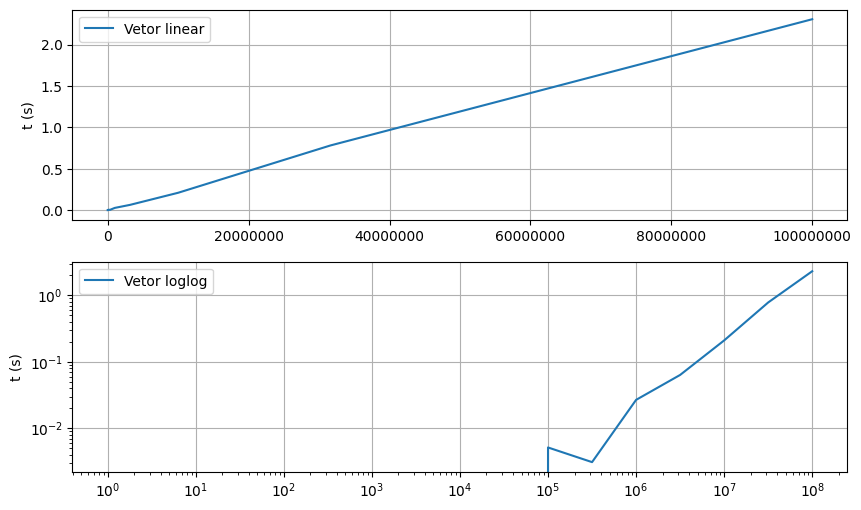

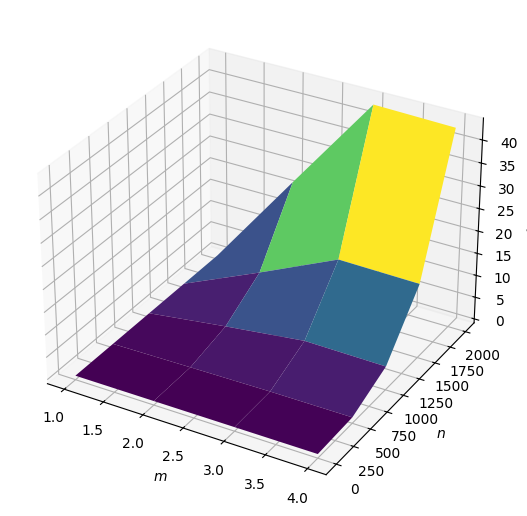

In [17]:
#Comando pra limpar a memória
%reset -f

#Exercicio 1

import numpy as np
import time
import matplotlib.pyplot as plt

#Vetor
n = []
for i in np.arange(0, 8.1, 0.5):
    n.append(round(pow(10,i)))

t1 = []

for i in n:
    tempo = time.time()
    vecA = np.random.randint(100, size=(i), dtype=np.int64)
    vecB = np.random.randint(100, size=(i), dtype=np.int64)
    alpha = np.random.randint(100)
    beta = np.random.randint(100)
    vecC = vecA * alpha + vecB * beta
    t1.append(time.time() - tempo)

fig, ax = plt.subplots(2, figsize=(10, 6))

ax[0].plot(n,t1)
ax[0].legend(['Vetor linear'])
ax[0].grid()
ax[0].set_ylabel('t (s)')
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[1].plot(n,t1)
ax[1].legend(['Vetor loglog'])
ax[1].grid()
ax[1].set_ylabel('t (s)')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

#Matriz
m = np.linspace(1,4,4).astype(int)
n = np.linspace(0, 2000, 5).astype(int)
t2 = np.empty(shape=(len(n), len(m)))

for i in range(len(n)):
    for j in range(len(m)):
        tempo = time.time()
        matriz = np.random.randint(100, size=(n[i],n[i]), dtype=np.int64)
        matriz = np.linalg.matrix_power(matriz, m[j])
        t2[i][j] = time.time() - tempo
        
x = m
y = n
X,Y = np.meshgrid(x, y)
Z = t2

fig = plt.figure()
ax = plt.axes(projection="3d", facecolor='w')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor=None)
ax.set(xlabel="$m$", ylabel="$n$", zlabel="t(n, m)")

fig.set_figheight(8)

m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(Z)
plt.show()

#Conclusões:
#Em relação ao primeiro ponto, o do vetor, a escala dos vetores acabou se mostrando não alterar tanto o tempo de processamento, 
#o qual manteve-se consistentemente curto. O que foi realmente afetado foi a memória RAM, a qual cresce de forma tão rápida que
#não foi possível calcular com 10^9 elementos.
#O gráfico linear acabou não sendo muito útil, pois ele não é capaz de mostrar os resultado com n muito menores que 10^8. O gráfico de log-log,
#no entanto, conseguiu mostrar bem o que ocorreu ao longo de toda a operação. Até cerca de 10^6 o processamento era tão rápido que operava mais
#rápido que o computador conseguia distinguir a apssagem do tempo, o que resultou em múltiplos tempos de processamento = 0, os quais não aparecem
#na escala logarítmica.
#Em relação ao segundo ponto, aqui a escala se mostrou consideravelmente importante para a velocidade. O tempo necessário entre 1500^2 e 2000^2
#elementos gerou uma diferença de tempo consideravelmente grande, chegando à variar entre alguns poucos segundos a mais de meio minuto. A potência
#também apresentou relevância, mas apenas nas matrizes maiores, então ela só apresenta relevância nas escalas muito grandes.

Valores de a: [0.         0.26666667 0.53333333 0.8        1.06666667 1.33333333
 1.6        1.86666667 2.13333333 2.4        2.66666667 2.93333333
 3.2        3.46666667 3.73333333 4.        ]

Feito na mão 
Medias:  [2.00000000e-05 2.65005115e-05 3.98581016e-05 8.22710101e-05
 6.25872692e-02 2.49854098e-01 3.74811061e-01 4.64083639e-01
 5.31044146e-01 5.83127190e-01 6.24794142e-01 6.58880412e-01
 6.56128898e-01 6.45316079e-01 6.59417590e-01 5.02133325e-01] 
Varianças:  [2.00000000e-06 2.12331570e-06 2.62309703e-06 4.42636422e-06
 1.56962383e-06 1.39569530e-05 3.64485297e-05 5.47600140e-05
 6.89016675e-05 7.99462075e-05 8.92614736e-05 1.00592789e-04
 2.05617839e-02 4.26987998e-02 4.79588222e-02 1.24442713e-01]

Feito com numpy 
Medias:  [2.00000000e-05 2.65005115e-05 3.98581016e-05 8.22710101e-05
 6.25872692e-02 2.49854098e-01 3.74811061e-01 4.64083639e-01
 5.31044146e-01 5.83127190e-01 6.24794142e-01 6.58880412e-01
 6.56128898e-01 6.45316079e-01 6.59417590e-01 5.02133325e-01] 
Varian

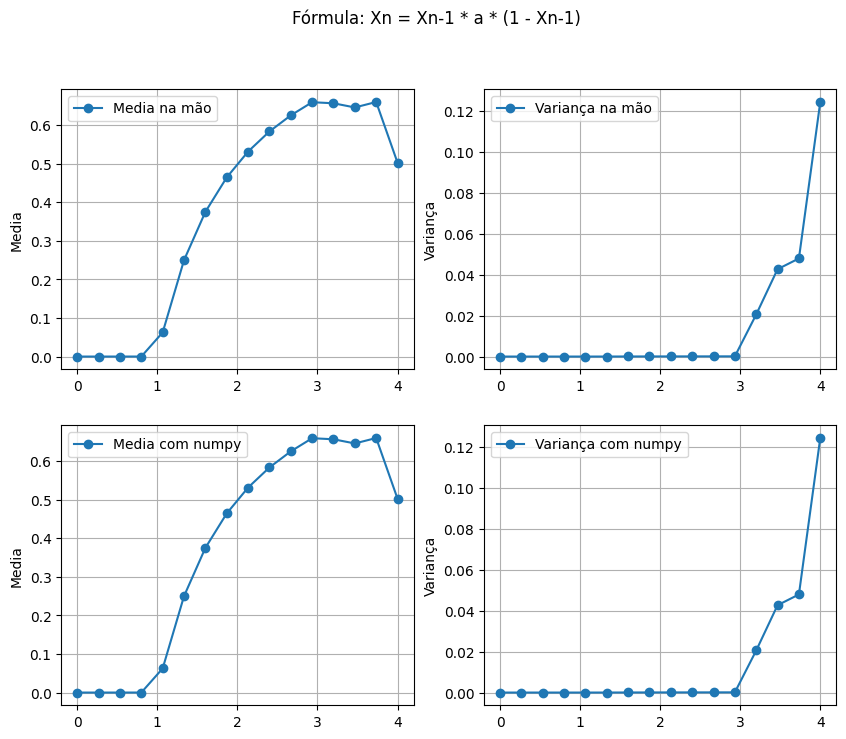

In [2]:
#Comando pra limpar a memória
%reset -f

#Exercício 2
import numpy as np

N = 5000

a = np.linspace(0, 4, 16)
a = np.sort(a)
print("Valores de a:", a)

valores = np.empty(shape=(len(a), N))

for i in range(len(a)):
    valores[i][0] = 0.1

#Criar os valores
for j in range(len(a)):
    for i in range(1, N):
        valores[j][i] = a[j]*valores[j][i-1]*(1 - valores[j][i-1])

#Calculando na mão
media = np.zeros(shape=(len(a)))

for j in range(len(a)):
    for x in valores[j]:
        media[j] += x

media /= N

varianca = np.zeros(shape=(len(a)))

for j in range(len(a)):
    for x in valores[j]:
        varianca[j] += pow((x - media[j]),2)

varianca /= (N-1)

print("\nFeito na mão", "\nMedias: ", media, "\nVarianças: ", varianca)

#Calculando usando numpy
mediasNp = np.empty(shape=(len(a)))
for i in range(len(valores)):
    mediasNp[i] = np.mean(valores[i])

variancasNp = np.empty(shape=(len(a)))
for i in range(len(valores)):
    variancasNp[i] = np.var(valores[i], ddof=1)

print("\nFeito com numpy", "\nMedias: ", mediasNp, "\nVarianças: ", variancasNp)

print("\nDiferenca das medias (mão - numpy): ", media - mediasNp, "\nDiferenca das varianças (mão - numpy): ", varianca - variancasNp) 

#Conclusões:
#Os dois métodos se provaram eficazes em conseguir o resultado, embora haja uma minúscula diferença entre eles, provavelmente por conta
#da imprecisão do cálculo de casas decimais muito pequenas
#Em relação aos resultados da função, percebe-se que a média não é diretamente proporcional ao valor de 'a', uma vez que ele aumenta e volta a diminuir
#múltiplas vezes, assim como o valor da variança, no entanto esta varia de forma muito mais acentuada

#====================================================================================================================================

#Exercício 3
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10, 8))

fig.suptitle("Fórmula: Xn = Xn-1 * a * (1 - Xn-1)")

ax[0,0].plot(a, media, marker='o')
ax[0,0].legend(['Media na mão'])
ax[0,0].grid()
ax[0,0].set_ylabel('Media')
ax[0,0].ticklabel_format(useOffset=False)


ax[0,1].plot(a, varianca, marker='o')
ax[0,1].legend(['Variança na mão'])
ax[0,1].grid()
ax[0,1].set_ylabel('Variança')
ax[0,1].ticklabel_format(useOffset=False)

ax[1,0].plot(a, mediasNp, marker='o')
ax[1,0].legend(['Media com numpy'])
ax[1,0].grid()
ax[1,0].set_ylabel('Media')
ax[1,0].ticklabel_format(useOffset=False)

ax[1,1].plot(a, variancasNp, marker='o')
ax[1,1].legend(['Variança com numpy'])
ax[1,1].grid()
ax[1,1].set_ylabel('Variança')
ax[1,1].ticklabel_format(useOffset=False)

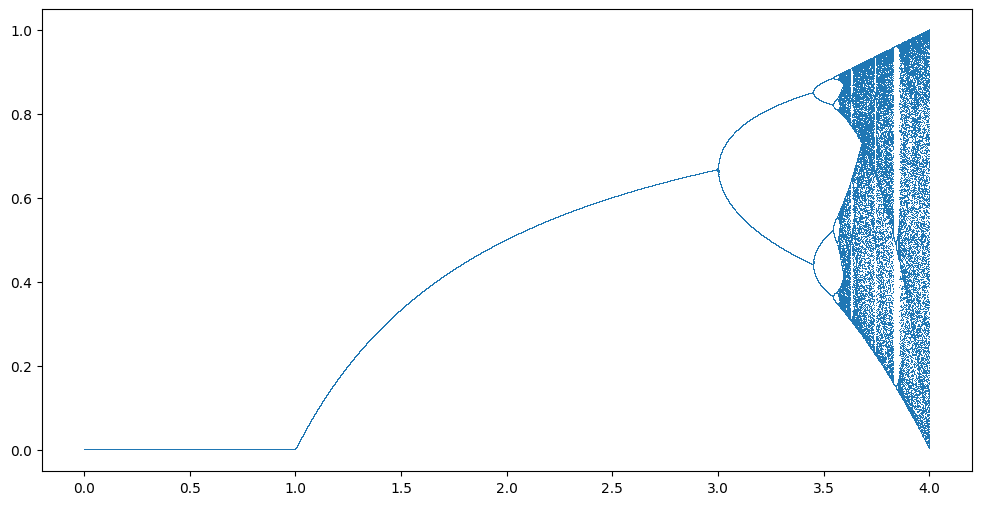

In [39]:
#Comando pra limpar a memória
%reset -f

#Exercício 4

import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(0, 4, 4*pow(10,5))
N = 600
valores = []

for a in A:
    x = np.random.rand()
    for i in range(N):
        x = a * x * (1 - x)

    valores.append(x)

plt.figure(figsize=(12,6))
plt.plot(A, valores, ls = '', marker = ',')
plt.show()

#O gráfico aqui apresenta a variação que os valores tomam quando o valor de a é alterado. Percebe-se que, até o a = 1, o valor sempre é zero,
#o que concorda os gráficos de média do exercício anterior, mostrando estarem corretos. A parte mais interessante deste gráfico está nos pontos 3
#e 3.5, os mesmos pontos em que os gráficos de variança do exercício anterior apresentaram variações. Estes são alguns dos pontos em que o 
#gráfico bifurca, o que significa que, quando há uma bifurcação, a taxa de crescimento da varianca se altera.
#Este gráfico explica as irregularidades dos gráficos anteriores, pois, como a população de pontos era muito menor, não era possível observar
#estas características tão curiosas da função.

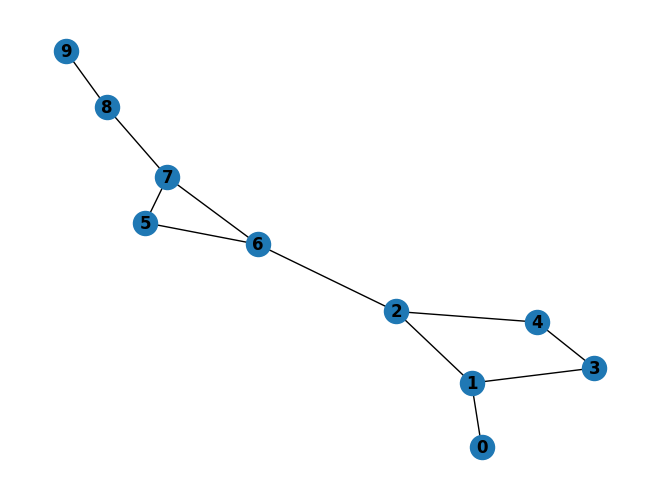


Comandos:
1 - Conectar dois nós
2 - Deletar conexão
3 - Deletar nó
4 - Encerra
 1
Primeiro nó:  0
Segundo nó:  9


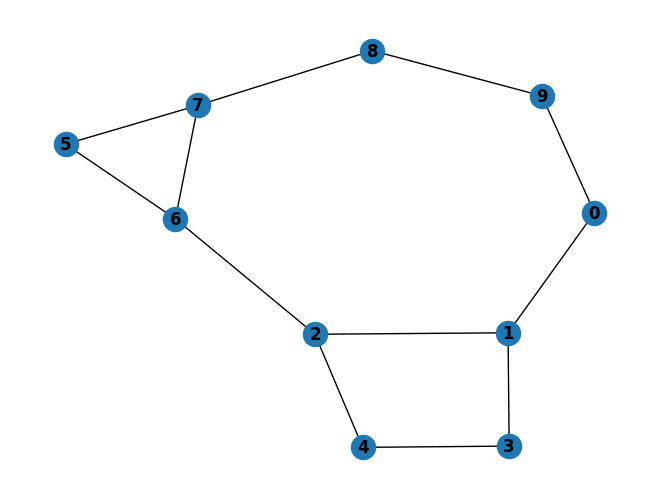


Comandos:
1 - Conectar dois nós
2 - Deletar conexão
3 - Deletar nó
4 - Encerra
 3
Qual nó:  2


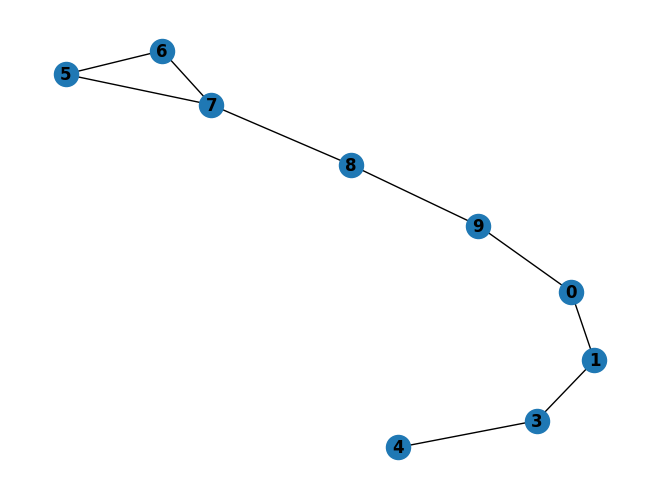


Comandos:
1 - Conectar dois nós
2 - Deletar conexão
3 - Deletar nó
4 - Encerra
 1
Primeiro nó:  3
Segundo nó:  5


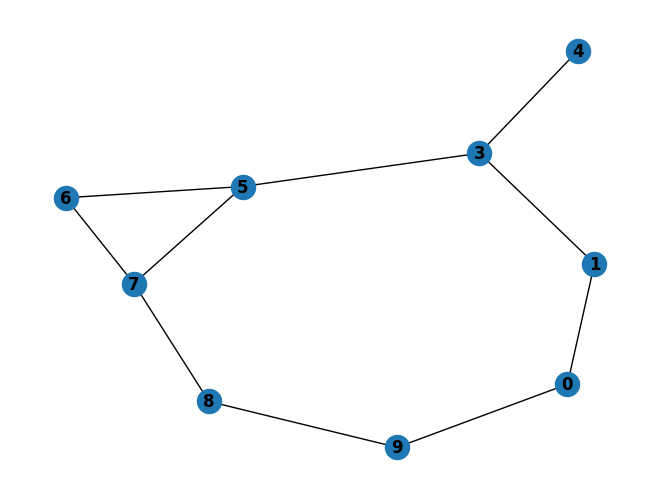


Comandos:
1 - Conectar dois nós
2 - Deletar conexão
3 - Deletar nó
4 - Encerra
 2
Primeiro nó:  6
Segundo nó:  7


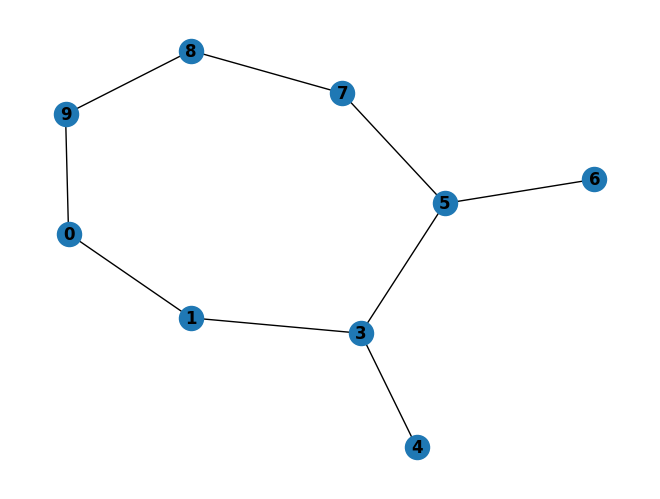


Comandos:
1 - Conectar dois nós
2 - Deletar conexão
3 - Deletar nó
4 - Encerra
 4


In [1]:
#Comando pra limpar a memória
%reset -f

#Exercício 5

import networkx as nx
import matplotlib.pyplot as plt

class Aresta:
    def __init__(self, no1, no2):  
        self._No1 = no1
        self._No2 = no2

    def NosConectados(self):
        return [self._No1, self._No2]

class No:
    def __init__(self, coord, info):
        self._Arestas = []
        self._Coord = coord
        self._Info = info

    def ConectarNo(self, no):
        for aresta in self._Arestas:
            if aresta.NosConectados()[1] == no:
                #print("Conexão repetida!")
                return
        
        self._Arestas.append(Aresta(self, no))
        no._Arestas.append(Aresta(no, self))
    
    def DesconectarNo(self, no, nos):
        for aresta in self._Arestas:
            if aresta.NosConectados()[1] == no:
                self._Arestas.remove(aresta)
                break

        for aresta in no._Arestas:
            if aresta.NosConectados()[1] == self:
                no._Arestas.remove(aresta)
                break
                
        if not no._Arestas:
            nos.remove(no)
            del no

        if not self._Arestas:
            nos.remove(self)
            del self

    def DeletarNo(self, nos):
        #Ele opera de forma invertida pois, ao apagar a conexão, ele pula indíces da lista
        for aresta in reversed(self._Arestas):
            aresta.NosConectados()[1].DesconectarNo(self, nos)

    def ArestasConectadas(self):
        return self._Arestas

    def Coord(self):
        return "X: " + str(self._Coord[0]) + "\tY: " + str(self._Coord[1])

    def Info(self):
        return self._Info

def EncontrarPosicaoNo(info, nos):
    for no in nos:
        if(no.Info() == info):
            return nos.index(no)

nos = []

for i in range(10):
    nos.append(No([i, i*2], i))

#No 0
nos[0].ConectarNo(nos[1])

#No 1
nos[1].ConectarNo(nos[2])
nos[1].ConectarNo(nos[3])

#No 2
nos[2].ConectarNo(nos[4])
nos[2].ConectarNo(nos[6])

#No 3
nos[3].ConectarNo(nos[1])
nos[3].ConectarNo(nos[4])

#No 4
nos[4].ConectarNo(nos[2])
nos[4].ConectarNo(nos[3])

#No 5
nos[5].ConectarNo(nos[6])
nos[5].ConectarNo(nos[7])

#No 6
nos[6].ConectarNo(nos[2])
nos[6].ConectarNo(nos[5])
nos[6].ConectarNo(nos[7])

#No 7
nos[7].ConectarNo(nos[5])
nos[7].ConectarNo(nos[6])
nos[7].ConectarNo(nos[8])

#No 8
nos[8].ConectarNo(nos[7])
nos[8].ConectarNo(nos[9])

#No 9
nos[9].ConectarNo(nos[8])

fim = 0
                   
while fim == 0:
    #Para desenhar o grafo
    conexoes = []
    for no in nos:
        if no.ArestasConectadas():
            for aresta in no.ArestasConectadas():
                conexoes.append([aresta.NosConectados()[0].Info(), aresta.NosConectados()[1].Info()])

    grafo = nx.Graph()
    grafo.add_nodes_from([no.Info() for no in nos])
    grafo.add_edges_from(conexoes)

    nx.draw(grafo, with_labels=True, font_weight='bold')
    plt.show()        
    
    escolha = int(input("\nComandos:\n1 - Conectar dois nós\n2 - Deletar conexão\n3 - Deletar nó\n4 - Encerra\n"))
    if(escolha == 4):
        fim = 1
    if(escolha == 1):
        no1 = EncontrarPosicaoNo(int(input("Primeiro nó: ")), nos)
        no2 = EncontrarPosicaoNo(int(input("Segundo nó: ")), nos)
        nos[no1].ConectarNo(nos[no2])
    if(escolha == 2):
        no1 = EncontrarPosicaoNo(int(input("Primeiro nó: ")), nos)
        no2 = EncontrarPosicaoNo(int(input("Segundo nó: ")), nos)
        nos[no1].DesconectarNo(nos[no2], nos)
    if(escolha == 3):
        no1 = EncontrarPosicaoNo(int(input("Qual nó: ")), nos)
        nos[no1].DeletarNo(nos)


        

In [58]:
#Comando pra limpar a memória

%reset -f